# Student Performance Analysis


Dataset available at: http://archive.ics.uci.edu/ml/datasets/Student+Performance#



________________________________________________________________________________________________________________________________

## 1. Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import classification_report

## 2. Load Dataset

In [2]:
# load datasets for two subjects, Math and Portuguese
mat = pd.read_csv("student-mat.csv", sep=',')
por = pd.read_csv("student-por.csv", sep=',')

In [3]:
mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## 3. Data Preparation

In [4]:
# merge datasets
df = pd.concat([mat,por])

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
# rename column labels
df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']

#### Distributing final scores in three categories for the purpose of classification
- Students with 16<= score <=20 get 'good'
- Students with 12<= score <=15 get 'fair'
- Students with  0 <=score <=11 get 'poor'

In [7]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
df['final_grade'] = 'na'
df.loc[(df.final_score >= 16) & (df.final_score <= 20), 'final_grade'] = 'good' 
df.loc[(df.final_score >= 12) & (df.final_score <= 15), 'final_grade'] = 'fair' 
df.loc[(df.final_score >= 0) & (df.final_score <= 11), 'final_grade'] = 'poor' 
df.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,poor
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,fair
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,poor


  # Let's have a look at the variables.

In [8]:
# look for missing values
df.isnull().any()

school                   False
sex                      False
age                      False
address                  False
family_size              False
parents_status           False
mother_education         False
father_education         False
mother_job               False
father_job               False
reason                   False
guardian                 False
commute_time             False
study_time               False
failures                 False
school_support           False
family_support           False
paid_classes             False
activities               False
nursery                  False
desire_higher_edu        False
internet                 False
romantic                 False
family_quality           False
free_time                False
go_out                   False
weekday_alcohol_usage    False
weekend_alcohol_usage    False
health                   False
absences                 False
period1_score            False
period2_score            False
final_sc

# * There is no missing values!*

###  Correlation Heatmap

Text(0.5,1,'Correlation Heatmap')

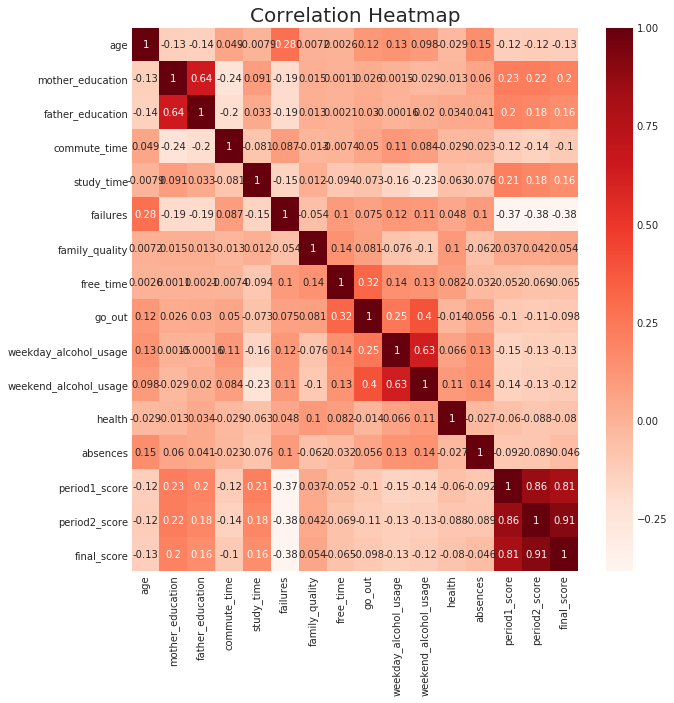

In [9]:
# see correlation between variables through a correlation heatmap
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

#  Classification
### Use Students' Information To Predict Their Final Grade

### 1 Prepare Dataset for Modelling

In [10]:
# create dataframe dfd for classification
dfd = df.copy()
dfd = dfd.drop([ 'final_score'], axis=1)

In [11]:
# label encode final_grade
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [12]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
df['final_grade'] = 'na'
df.loc[(df.final_score >= 15) & (df.final_score <= 20), 'final_grade'] = 'good' 
df.loc[(df.final_score >= 10) & (df.final_score <= 14), 'final_grade'] = 'fair' 
df.loc[(df.final_score >= 0) & (df.final_score <= 9), 'final_grade'] = 'poor' 
df.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,fair


In [13]:
dfd.final_grade = le.fit_transform(dfd.final_grade)

In [14]:
# dataset train_test_split
from sklearn.cross_validation import train_test_split
X = dfd.drop('final_grade',axis=1)
y = dfd.final_grade
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

/home/sarthak/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
# get dummy varibles 
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [16]:
# see total number of features
len(list(X_train))

58

### Every algorithm has its intrinsic capacity to outperform other algorithm depending upon the situation. For example, Random Forest performs much better with a large number of datasets than when data is small while Support Vector Machine performs better with a smaller number of data sets. 

### In general SVMs are good because the training algorithm is efficient, and it has a regularisation parameter, which forces you to think about regularisation and over-fitting. 

### 2. Decision Tree Classification

In [17]:
# find the optimal # of minimum samples leaf
from sklearn.tree import DecisionTreeClassifier

msl=[]
for i in range(1,58):
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    t= tree.fit(X_train, y_train)
    ts=t.score(X_test, y_test)
    msl.append(ts)
msl = pd.Series(msl)
msl.where(msl==msl.max()).dropna()

21    0.907643
22    0.907643
23    0.907643
24    0.907643
25    0.907643
26    0.907643
27    0.907643
28    0.907643
29    0.907643
30    0.907643
31    0.907643
32    0.907643
33    0.907643
34    0.907643
35    0.907643
36    0.907643
37    0.907643
38    0.907643
39    0.907643
40    0.907643
41    0.907643
42    0.907643
43    0.907643
44    0.907643
45    0.907643
46    0.907643
47    0.907643
48    0.907643
49    0.907643
50    0.907643
51    0.907643
52    0.907643
53    0.907643
54    0.907643
55    0.907643
56    0.907643
dtype: float64

In [18]:
# final model
tree = DecisionTreeClassifier(min_samples_leaf=17)
t= tree.fit(X_train, y_train)
print("Decisioin Tree Model Score" , ":" , t.score(X_train, y_train) , "," , 
      "Cross Validation Score" ,":" , t.score(X_test, y_test))

Decisioin Tree Model Score : 0.9082191780821918 , Cross Validation Score : 0.8980891719745223


In [19]:
res = tree.predict(X_test)

[[ 81   9  14]
 [  3  30   0]
 [  6   0 171]]


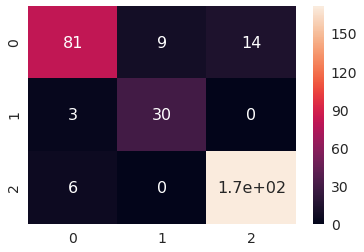

In [20]:
cm1=metrics.confusion_matrix(y_test,res)
print(cm1)
df_cm = pd.DataFrame(cm1, range(3),
                  range(3))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [21]:
report = classification_report(y_test, res)
print(report)

             precision    recall  f1-score   support

          0       0.90      0.78      0.84       104
          1       0.77      0.91      0.83        33
          2       0.92      0.97      0.94       177

avg / total       0.90      0.90      0.90       314



### 3. Random Forest Classification

In [22]:
# find a good # of estimators
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,58):
    forest = RandomForestClassifier()
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

/home/sarthak/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


53    0.882166
dtype: float64

In [23]:
# find a good # of min_samples_leaf
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,58):
    forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=i)
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

5    0.898089
dtype: float64

In [24]:
# final model
forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=2)
f = forest.fit(X_train, y_train)
print("Raondom Forest Model Score" , ":" , f.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , f.score(X_test, y_test))

Raondom Forest Model Score : 0.9767123287671233 , Cross Validation Score : 0.8757961783439491


In [25]:
res = f.predict(X_test)

[[ 85   4  15]
 [ 11  22   0]
 [  9   0 168]]


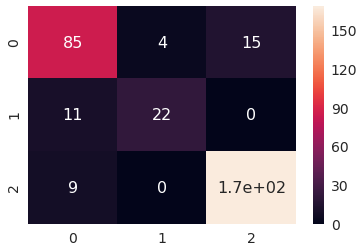

In [26]:
cm=metrics.confusion_matrix(y_test,res)
print(cm)
df_cm = pd.DataFrame(cm, range(3),
                  range(3))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [27]:
report = classification_report(y_test, res)
print(report)

             precision    recall  f1-score   support

          0       0.81      0.82      0.81       104
          1       0.85      0.67      0.75        33
          2       0.92      0.95      0.93       177

avg / total       0.87      0.88      0.87       314



### 4. Support Vector Classification

In [28]:
from sklearn.svm import SVC
svc = SVC()
s= svc.fit(X_train, y_train)
print("SVC Model Score" , ":" , s.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , s.score(X_test, y_test))

SVC Model Score : 0.9342465753424658 , Cross Validation Score : 0.8630573248407644


In [29]:
res = s.predict(X_test)

[[ 86   6  12]
 [  9  24   0]
 [ 16   0 161]]


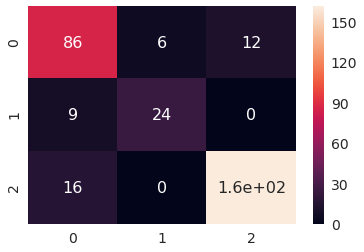

In [30]:
cm=metrics.confusion_matrix(y_test,res)
print(cm)
df_cm = pd.DataFrame(cm, range(3),
                  range(3))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [31]:
report = classification_report(y_test, res)
print(report)

             precision    recall  f1-score   support

          0       0.77      0.83      0.80       104
          1       0.80      0.73      0.76        33
          2       0.93      0.91      0.92       177

avg / total       0.87      0.86      0.86       314



### As visible from the above results, DecisionTree, RandomForest and Support Vector Classifiers perform almost equally.

### 5. Ada Boost Classification

In [41]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=3)
af = ada.fit(X_train, y_train)
print("Ada Boost Model Score" , ":" , af.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , af.score(X_test, y_test))

Ada Boost Model Score : 0.815068493150685 , Cross Validation Score : 0.8280254777070064


In [42]:
res = af.predict(X_test)

[[ 88   2  14]
 [ 32   1   0]
 [  5   1 171]]


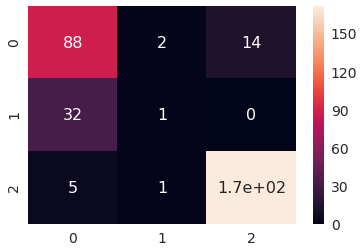

In [43]:
cm=metrics.confusion_matrix(y_test,res)
print(cm)
df_cm = pd.DataFrame(cm, range(3),
                  range(3))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [44]:
report = classification_report(y_test, res)
print(report)

             precision    recall  f1-score   support

          0       0.70      0.85      0.77       104
          1       0.25      0.03      0.05        33
          2       0.92      0.97      0.94       177

avg / total       0.78      0.83      0.79       314



- Ada Boost classifier builds decision boundary using several different types of classifiers. Hence, it doesn't perform as well as the above 3 machine learning models. It gives close to 80% precision,recall and f1 scores.

### 6. Multi Layer Perceptron Classification

In [36]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation = "tanh", solver = "adam", alpha = 0.0001, max_iter = 20000, )
sf = mlp.fit(X_train, y_train)
print("Multi Layer Perceptron Model Score" , ":" , sf.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , sf.score(X_test, y_test))

Multi Layer Perceptron Model Score : 0.9643835616438357 , Cross Validation Score : 0.8312101910828026


In [37]:
res = mlp.predict(X_test)

[[ 79  10  15]
 [  8  25   0]
 [ 20   0 157]]


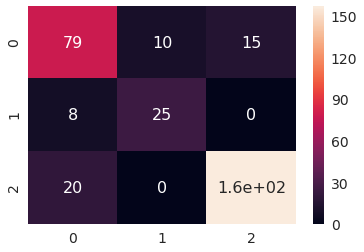

In [38]:
cm=metrics.confusion_matrix(y_test,res)
print(cm)
df_cm = pd.DataFrame(cm, range(3),
                  range(3))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [39]:
report = classification_report(y_test, res)
print(report)

             precision    recall  f1-score   support

          0       0.74      0.76      0.75       104
          1       0.71      0.76      0.74        33
          2       0.91      0.89      0.90       177

avg / total       0.83      0.83      0.83       314



- Size of the Dataset is not sufficient for accurately mapping the non-linear data distribution function. Therefore, we are not able to witness the full potential of neural networks in this dataset. For more accurate mapping, we would want to go for even deeper neural network architecture, for training which, we would require much larger amounts. 

### Therefore, the best model for prediction of final grade, as per the given dataset, is found to be Support Vector Classifier